# Import all necessary libraries

In [1]:
import nltk
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
#nltk.download('stopwords')
#nltk.download('wordnet')


# To read the csv file using pandas library

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth',100)
df=pd.read_csv(r"C:\Users\DELL\GrammarandProductReviews.csv",encoding='UTF-8',sep=',')

df.head()

,rating,reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE...
1,5,Good flavor. This review was collected as part of a promotion.
2,5,Good flavor.
3,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, an..."
4,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my ...


In [3]:
df.shape

(71044, 2)

# To count how many rating of each rating class

In [4]:
df['rating'].value_counts()

5    46543
4    14598
3     4369
1     3701
2     1833
Name: rating, dtype: int64

# Exploratory data analysis (EDA)
EDA is done to analysis data and visualize data in different bar-chart and graphs.

# Visualize the count of rating

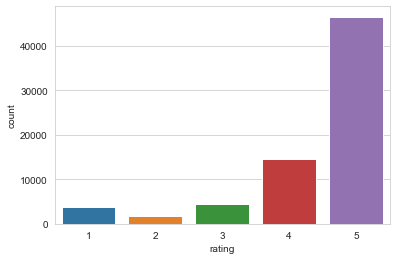

In [5]:
sns.set_style('whitegrid')
sns.countplot(df['rating'])

# Missing Values
We can use seaborn to create a simple heatmap to see wherewe are missing data.

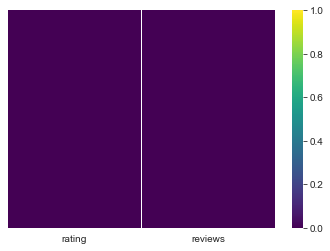

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [7]:
#To check where the null value if it show true then that is null value, if false then no null value.

df.isnull()

,rating,reviews
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
71039,False,False
71040,False,False
71041,False,False
71042,False,False


In [8]:
#Another way to check the missing data/Count the empty values in each column.


df.isna().sum()

rating      0
reviews    36
dtype: int64

In above, we find there are 36 data are missing in reviews columns.So, we have to remove these null in the below preprossing step to get better model accuracy. 

In [9]:
#To get more information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   71044 non-null  int64 
 1   reviews  71008 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [10]:
#To show all null values of reviews in each rows 

print(df[df.isna().any(axis=1)]) #OR-->print(df[df.isnull().any(axis=1)])

       rating reviews
1361        5     NaN
3735        5     NaN
18084       5     NaN
18086       5     NaN
18437       5     NaN
18439       5     NaN
18441       5     NaN
22301       4     NaN
22302       4     NaN
22312       5     NaN
22313       5     NaN
22314       5     NaN
22315       5     NaN
26539       5     NaN
26541       5     NaN
26542       5     NaN
26543       5     NaN
27463       3     NaN
27502       5     NaN
29131       5     NaN
29132       5     NaN
31571       2     NaN
31579       5     NaN
32229       5     NaN
32231       5     NaN
36587       5     NaN
36887       4     NaN
36902       5     NaN
38905       5     NaN
55762       4     NaN
60163       5     NaN
60320       3     NaN
61434       4     NaN
61865       4     NaN
68110       5     NaN
70926       5     NaN


# Removing the null value

In [11]:
# df.dropna(inplace=True)
# df

In [12]:
# #To remove all the rows that contains null values

df.dropna(subset = ["reviews"], inplace=True)
df


,rating,reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE...
1,5,Good flavor. This review was collected as part of a promotion.
2,5,Good flavor.
3,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, an..."
4,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my ...
...,...,...
71039,5,I'm dealing with dry eyes and very sensitive to products. The eye clinic suggested this product ...
71040,5,Great stuff! Helps keep my contacts moist all day!
71041,5,Right price
71042,5,I was so pleased when this scarf arrived for multiple reasons. The print and colors are beautifu...


In [13]:
#Checking again, Is there is a missing value or not?

df.isna().sum()

rating     0
reviews    0
dtype: int64

In [14]:
df.shape

(71008, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71008 entries, 0 to 71043
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   71008 non-null  int64 
 1   reviews  71008 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


# Visualize the count of rating after removing null rows

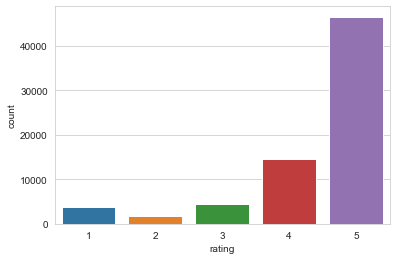

In [16]:
sns.set_style('whitegrid')
sns.countplot(df['rating'])

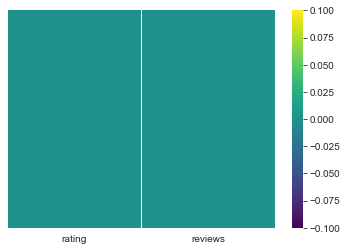

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [18]:
#df.describe().transpose()

# Text Cleaning/Preprocessing

In [19]:
df.reviews = df.reviews.astype(str) 
df.rating = df.rating.astype(int) 
df.reviews = df.reviews.apply(lambda x: x.lower())
df.head()

,rating,reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype...
1,5,good flavor. this review was collected as part of a promotion.
2,5,good flavor.
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, an..."
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my ...


In [20]:
#First level of cleaning

import re
import string
def text_clean_1(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1 = lambda x: text_clean_1(x)

In [21]:
df['cleaned_reviews'] = df['reviews'].apply(cleaned1)
df.head()

,rating,reviews,cleaned_reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype...,i love this album its very good more to the hip hop side than her current pop sound so hype i li...
1,5,good flavor. this review was collected as part of a promotion.,good flavor this review was collected as part of a promotion
2,5,good flavor.,good flavor
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, an...",i read through the reviews on here before looking in to buying one of the couples lubricants and...
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my ...,my husband bought this gel for us the gel caused irritation and it felt like it was burning my s...


In [22]:
#Second level of cleaning

def text_clean_2(text):
    text = re.sub('[''""..]', '', text)
    text = re.sub('\n', '', text)
    return text
cleaned2 = lambda x: text_clean_2(x)

In [23]:
df['cleaned_reviews_new'] = df['cleaned_reviews'].apply(cleaned2)
df.head()


,rating,reviews,cleaned_reviews,cleaned_reviews_new
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype...,i love this album its very good more to the hip hop side than her current pop sound so hype i li...,i love this album its very good more to the hip hop side than her current pop sound so hype i li...
1,5,good flavor. this review was collected as part of a promotion.,good flavor this review was collected as part of a promotion,good flavor this review was collected as part of a promotion
2,5,good flavor.,good flavor,good flavor
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, an...",i read through the reviews on here before looking in to buying one of the couples lubricants and...,i read through the reviews on here before looking in to buying one of the couples lubricants and...
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my ...,my husband bought this gel for us the gel caused irritation and it felt like it was burning my s...,my husband bought this gel for us the gel caused irritation and it felt like it was burning my s...


In [24]:
df.isna().sum()

rating                 0
reviews                0
cleaned_reviews        0
cleaned_reviews_new    0
dtype: int64

In [25]:
df.shape

(71008, 4)

# Train Test split

In [26]:
# Split the dataset into features data and target data

y = df.rating
X = df.cleaned_reviews_new

In [27]:
#Split the dataset again, into 70% training dataset and 30% twsting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [28]:
print('X_train :', (len(X_train)))
print('X_test :', (len(X_test)))
print('y_train :', (len(y_train)))
print('y_test :', (len(y_test)))

X_train : 49705
X_test : 21303
y_train : 49705
y_test : 21303


# Implementing the Logistic Regression Algorithm 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_fVectorizer = TfidfVectorizer(lowercase = True)

from sklearn.linear_model import LogisticRegression

Logistic_Regression = LogisticRegression(solver = "lbfgs")


In [41]:
from sklearn.pipeline import Pipeline

P = Pipeline([('vectorizer',Tfid_fVectorizer),('classifier',Logistic_Regression)])
P.fit(X_train,y_train)

Prediction = P.predict(X_test)

#Pfit.(self, X, y, **fit_params)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Prediction, y_test)

array([[  749,   128,    76,    40,    40],
       [   27,    37,    20,    12,     9],
       [   37,    80,   264,   120,    49],
       [   40,    96,   455,  1048,   734],
       [  306,   190,   519,  3124, 13103]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score = accuracy_score(y_test, Prediction)
precision_score = precision_score(y_test, Prediction, average='weighted')
recall_score = recall_score(y_test, Prediction, average='weighted')

print("Model Accuracy on test dataset: ", accuracy_score)
print("Model precision on test dataset: ", precision_score)
print("Model recall on test dataset: ", recall_score)

Model Accuracy on test dataset:  0.7135614702154626
Model precision on test dataset:  0.6654514666680915
Model recall on test dataset:  0.7135614702154626


# Check for real world input

In [50]:
new_review = ['This product is good']
result = P.predict(new_review)
print(result)

[5]


# Implementing the Naive Bayes model 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_fVectorizer = TfidfVectorizer(lowercase = True)

from sklearn.naive_bayes import MultinomialNB
Multi_nomialNB = MultinomialNB()


In [35]:
from sklearn.pipeline import Pipeline

P1 = Pipeline([('vectorizer',Tfid_fVectorizer),('classifier', Multi_nomialNB)])
P1.fit(X_train,y_train)

Predictions = P1.predict(X_test)

#Pfit.(self, X, y, **fit_params)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Predictions, y_test)

array([[   44,     4,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       [    2,     9,    45,    55,    37],
       [ 1113,   518,  1289,  4289, 13898]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score = accuracy_score(y_test, Predictions)
precision_score = precision_score(y_test, Predictions, average='weighted')
recall_score = recall_score(y_test, Predictions, average='weighted')

print("Model Accuracy on test dataset: ", accuracy_score)
print("Model precision on test dataset: ", precision_score)
print("Model recall on test dataset: ", recall_score)

Model Accuracy on test dataset:  0.6570436088813782
Model precision on test dataset:  0.5563678834850123
Model recall on test dataset:  0.6570436088813782


# Check for real world input

In [38]:
example = ['This website is fault']
result = P1.predict(example)
print(result)

[5]
